# What is the most optimum skills to learn as a Data Analyst in India.

## Steps  
1. **Group skills to determine median salary and likelihood of being in posting**  
2. **Visualize median salary vs percent skill demand**  

### Importing libraries & basic cleaning 

In [53]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #turning the job skills into a list

### Filtering based on country

In [96]:
country_name = "United States" #stored in a variable so that later we can compare against USA

df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == country_name)].copy()

df_DA = df_DA.dropna(subset=['salary_year_avg'])

df_DA_exploded = df_DA.explode('job_skills')

df_DA_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


### Grouping and calculating percentage

In [97]:
df_DA_skills = df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA)  # Find total length of DA jobs in India or USA

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100


df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [98]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit] # we gonna plot skills with atleast 5 percent 

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Scatter plotting

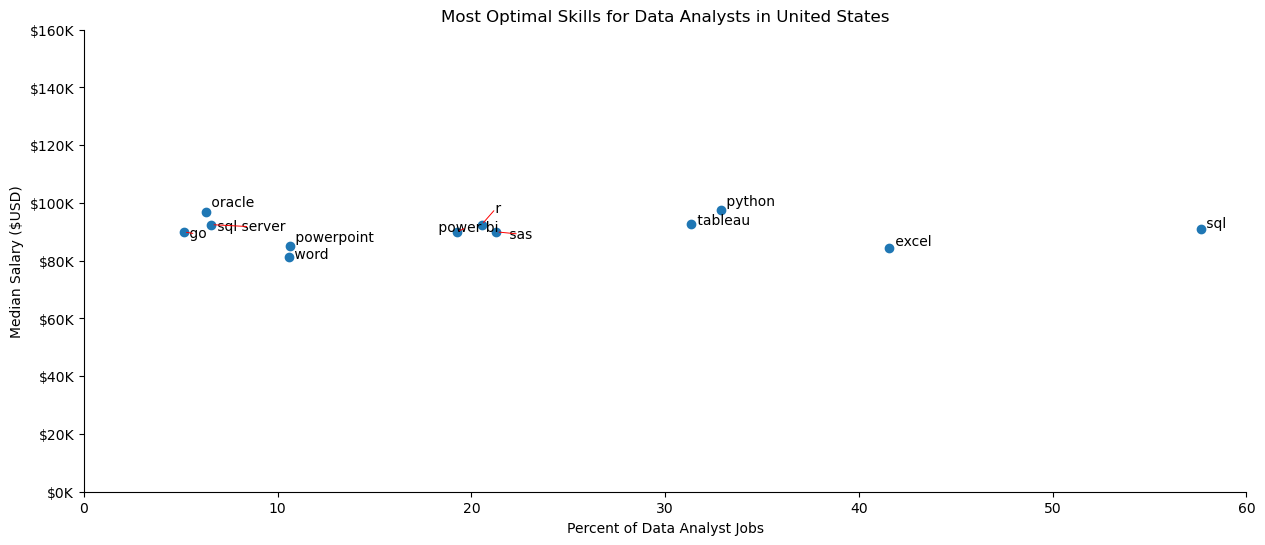

In [99]:
from adjustText import adjust_text

plt.figure(figsize=(15, 6))

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  
plt.title(f'Most Optimal Skills for Data Analysts in {country_name}')
plt.xlim(0, 60)
plt.ylim(0, 160000)


ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(
    texts,
    arrowprops=dict(arrowstyle='-', color='red', lw=0.7, shrinkA=2, shrinkB=2),
    # arrowprops=dict(arrowstyle='-', color='red'),
    force_text=0.5,     
    force_points=0.1,   
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4),
    only_move={'points':'y', 'text':'xy'}  
)

plt.show()